<a href="https://colab.research.google.com/github/sayeedafathima/ores-02/blob/main/finalassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL PROJECT **
In this project, I have research on natality(birth rate) in USA and infants and neonatal birthrate from kaggle, data.CDC.gov and CDC.WONDER.In this project, I am going to analyse the birth rate in USA and infant and neonatal mortality rate and then write to analyse the reason and cause of these infants death to know whether it is related to race, education or mother's eating habits.

# SOURCE OF DATA:
us_births_2016_2021(https://www.kaggle.com/datasets/danbraswell/temporary-us-births)  as csv file downloaded from kaggle.com

Infant_neonatal__postneonatal__fetal__and_perinatal_mortality_rates__by_detailed_race_and_Hispanic_origin_of_mother__United_States (1).xlsx as excel from CDC.

Infant death 2018-2019 (https://wonder.cdc.gov/) extracted from CDC wonders.

Infant death 2018 -2019 (https://wonder.cdc.gov/) extracted from CDC wonders.


In [44]:
import pandas as pd

# US BIRTH DATSET FROM 2016-2021:
The first dataset is USA birth 2016-2021 which was downloaded from the kaggle website in csv format which contains information about number of births in different states of USA in specific year with education level of mother.


In [45]:
# read the first dataset which contains birth information and education level of mother.
birth_data= pd.read_csv("/content/us_births_2016_2021.csv")

In [46]:
#display of US birth data set.
birth_data

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3
...,...,...,...,...,...,...,...,...,...
5491,Wyoming,WY,2021,M,"Associate degree (AA, AS)",5,401,29.2,3261.1
5492,Wyoming,WY,2021,M,"Bachelor's degree (BA, AB, BS)",6,657,30.7,3286.0
5493,Wyoming,WY,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,261,33.0,3249.3
5494,Wyoming,WY,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",8,72,33.3,3262.0


In [47]:
# here we are filtering the dataset between 2018 to 2021 to concentrate on these recent years was analysis
birth_data = birth_data[(birth_data['Year'] >= 2018) & (birth_data['Year'] <= 2021)]

In [48]:
# Group by 'State' and calculate the total number of births for each state
total_births_by_state = birth_data.groupby('State')['Number of Births'].sum().reset_index()

# Merge the total births data back into the original DataFrame
birth_data = pd.merge(birth_data, total_births_by_state, on='State', how='left', suffixes=('', '_Total'))

# Display the merged DataFrame
birth_data


,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Number of Births_Total
0,Alabama,AL,2018,F,8th grade or less,1,909,27.8,3167.6,232077
1,Alabama,AL,2018,F,9th through 12th grade with no diploma,2,3031,24.4,3012.0,232077
2,Alabama,AL,2018,F,High school graduate or GED completed,3,8901,25.5,3064.7,232077
3,Alabama,AL,2018,F,"Some college credit, but not a degree",4,6024,27.0,3130.8,232077
4,Alabama,AL,2018,F,"Associate degree (AA, AS)",5,2466,28.9,3176.6,232077
...,...,...,...,...,...,...,...,...,...,...
3661,Wyoming,WY,2021,M,"Associate degree (AA, AS)",5,401,29.2,3261.1,25492
3662,Wyoming,WY,2021,M,"Bachelor's degree (BA, AB, BS)",6,657,30.7,3286.0,25492
3663,Wyoming,WY,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,261,33.0,3249.3,25492
3664,Wyoming,WY,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",8,72,33.3,3262.0,25492


In [49]:
# Here we are removing the unwnated columns such as state abbrevation, education level code and average birth weight
birth_data = birth_data.drop(columns=['Education Level Code', 'State Abbreviation', 'Average Birth Weight (g)', 'Number of Births'])

# display modified birth data
birth_data

,State,Year,Gender,Education Level of Mother,Average Age of Mother (years),Number of Births_Total
0,Alabama,2018,F,8th grade or less,27.8,232077
1,Alabama,2018,F,9th through 12th grade with no diploma,24.4,232077
2,Alabama,2018,F,High school graduate or GED completed,25.5,232077
3,Alabama,2018,F,"Some college credit, but not a degree",27.0,232077
4,Alabama,2018,F,"Associate degree (AA, AS)",28.9,232077
...,...,...,...,...,...,...
3661,Wyoming,2021,M,"Associate degree (AA, AS)",29.2,25492
3662,Wyoming,2021,M,"Bachelor's degree (BA, AB, BS)",30.7,25492
3663,Wyoming,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",33.0,25492
3664,Wyoming,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",33.3,25492


# INFANT DEATH DATASET:

The next two dataset are about infant mortality in 2018-2019 and 2020-2021 in excel format which was extracted from CDC wonders. This datasets has state column, mother age column and cause of death and number of deaths information. In following process include the merging of these to dataset to create a single dataset which has all the information from both dataset from 2018-2021 years.

In [50]:
# read infant death 2018-2019 datset
death_data1 = pd.read_excel("/content/infant death2018-2019.xlsx")

# display death_data1
death_data1

,State,State code,Age of Mother Code,Cause of death,Death code,Age of Infant at death,Year of death,Deaths,Births,Death Rate
0,Alabama,1,20-24 years,Extreme immaturity,P07.2,Under 1 hour,2018,14,15268,0.92 (Unreliable)
1,Alabama,1,20-24 years,Other ill-defined and unspecified causes of mo...,R99,28 - 364 days,2018,11,15268,0.72 (Unreliable)
2,Alabama,1,20-24 years,Other ill-defined and unspecified causes of mo...,R99,28 - 364 days,2019,19,15279,1.24 (Unreliable)
3,Alabama,1,25-29 years,Extreme immaturity,P07.2,Under 1 hour,2019,10,18662,0.54 (Unreliable)
4,Alabama,1,25-29 years,Extreme immaturity,P07.2,1 - 23 hours,2018,12,18348,0.65 (Unreliable)
...,...,...,...,...,...,...,...,...,...,...
349,Virginia,51,30-34 years,Sudden infant death syndrome - SIDS,R95,28 - 364 days,2018,11,30639,0.36 (Unreliable)
350,Virginia,51,30-34 years,Sudden infant death syndrome - SIDS,R95,28 - 364 days,2019,12,30213,0.40 (Unreliable)
351,Washington,53,20-24 years,Sudden infant death syndrome - SIDS,R95,28 - 364 days,2019,11,13675,0.82 (Unreliable)
352,Wisconsin,55,20-24 years,Extreme immaturity,P07.2,Under 1 hour,2019,10,10547,0.95 (Unreliable)


In [51]:
# read second dataset of infant death 2020-2021
death_data2 = pd.read_excel("/content/infant death2018-2019.xlsx")

# display death_data2
death_data2

,State,State code,Age of Mother Code,Cause of death,Death code,Age of Infant at death,Year of death,Deaths,Births,Death Rate
0,Alabama,1,20-24 years,Extreme immaturity,P07.2,Under 1 hour,2018,14,15268,0.92 (Unreliable)
1,Alabama,1,20-24 years,Other ill-defined and unspecified causes of mo...,R99,28 - 364 days,2018,11,15268,0.72 (Unreliable)
2,Alabama,1,20-24 years,Other ill-defined and unspecified causes of mo...,R99,28 - 364 days,2019,19,15279,1.24 (Unreliable)
3,Alabama,1,25-29 years,Extreme immaturity,P07.2,Under 1 hour,2019,10,18662,0.54 (Unreliable)
4,Alabama,1,25-29 years,Extreme immaturity,P07.2,1 - 23 hours,2018,12,18348,0.65 (Unreliable)
...,...,...,...,...,...,...,...,...,...,...
349,Virginia,51,30-34 years,Sudden infant death syndrome - SIDS,R95,28 - 364 days,2018,11,30639,0.36 (Unreliable)
350,Virginia,51,30-34 years,Sudden infant death syndrome - SIDS,R95,28 - 364 days,2019,12,30213,0.40 (Unreliable)
351,Washington,53,20-24 years,Sudden infant death syndrome - SIDS,R95,28 - 364 days,2019,11,13675,0.82 (Unreliable)
352,Wisconsin,55,20-24 years,Extreme immaturity,P07.2,Under 1 hour,2019,10,10547,0.95 (Unreliable)


In [52]:
# combining the two datasets to get all the information of both dataset in single dataset from 2018-2021
death_data = pd.concat([death_data1, death_data2])

# display final infant death 2018-2021 dataset
death_data

,State,State code,Age of Mother Code,Cause of death,Death code,Age of Infant at death,Year of death,Deaths,Births,Death Rate
0,Alabama,1,20-24 years,Extreme immaturity,P07.2,Under 1 hour,2018,14,15268,0.92 (Unreliable)
1,Alabama,1,20-24 years,Other ill-defined and unspecified causes of mo...,R99,28 - 364 days,2018,11,15268,0.72 (Unreliable)
2,Alabama,1,20-24 years,Other ill-defined and unspecified causes of mo...,R99,28 - 364 days,2019,19,15279,1.24 (Unreliable)
3,Alabama,1,25-29 years,Extreme immaturity,P07.2,Under 1 hour,2019,10,18662,0.54 (Unreliable)
4,Alabama,1,25-29 years,Extreme immaturity,P07.2,1 - 23 hours,2018,12,18348,0.65 (Unreliable)
...,...,...,...,...,...,...,...,...,...,...
349,Virginia,51,30-34 years,Sudden infant death syndrome - SIDS,R95,28 - 364 days,2018,11,30639,0.36 (Unreliable)
350,Virginia,51,30-34 years,Sudden infant death syndrome - SIDS,R95,28 - 364 days,2019,12,30213,0.40 (Unreliable)
351,Washington,53,20-24 years,Sudden infant death syndrome - SIDS,R95,28 - 364 days,2019,11,13675,0.82 (Unreliable)
352,Wisconsin,55,20-24 years,Extreme immaturity,P07.2,Under 1 hour,2019,10,10547,0.95 (Unreliable)


In [53]:
#removing the unwnated columns from combined infant death dataset
death_data = death_data.drop(columns=['State code', ' Death code', 'Age of Mother Code','Death Rate'])

#display infant death dataset
death_data

,State,Cause of death,Age of Infant at death,Year of death,Deaths,Births
0,Alabama,Extreme immaturity,Under 1 hour,2018,14,15268
1,Alabama,Other ill-defined and unspecified causes of mo...,28 - 364 days,2018,11,15268
2,Alabama,Other ill-defined and unspecified causes of mo...,28 - 364 days,2019,19,15279
3,Alabama,Extreme immaturity,Under 1 hour,2019,10,18662
4,Alabama,Extreme immaturity,1 - 23 hours,2018,12,18348
...,...,...,...,...,...,...
349,Virginia,Sudden infant death syndrome - SIDS,28 - 364 days,2018,11,30639
350,Virginia,Sudden infant death syndrome - SIDS,28 - 364 days,2019,12,30213
351,Washington,Sudden infant death syndrome - SIDS,28 - 364 days,2019,11,13675
352,Wisconsin,Extreme immaturity,Under 1 hour,2019,10,10547


In [65]:
# merging infant death dataset with USA birth dataset
merged_data = birth_data.merge(death_data, left_on=['State', 'Year',] , right_on=['State', 'Year of death' ])

# display merge dataset of birth and death of infants
merged_data

,State,Year,Gender,Education Level of Mother,Average Age of Mother (years),Number of Births_Total,Cause of death,Age of Infant at death,Year of death,Deaths,Births
0,Alabama,2018,F,8th grade or less,27.8,232077,Extreme immaturity,Under 1 hour,2018,14,15268
1,Alabama,2018,F,8th grade or less,27.8,232077,Other ill-defined and unspecified causes of mo...,28 - 364 days,2018,11,15268
2,Alabama,2018,F,8th grade or less,27.8,232077,Extreme immaturity,1 - 23 hours,2018,12,18348
3,Alabama,2018,F,8th grade or less,27.8,232077,Other ill-defined and unspecified causes of mo...,28 - 364 days,2018,11,18348
4,Alabama,2018,F,8th grade or less,27.8,232077,Extreme immaturity,Under 1 hour,2018,14,15268
...,...,...,...,...,...,...,...,...,...,...,...
12739,Wisconsin,2019,M,"Doctorate (PhD, EdD) or Professional Degree (M...",33.6,249743,Other ill-defined and unspecified causes of mo...,28 - 364 days,2019,14,19512
12740,Wisconsin,2019,M,Unknown or Not Stated,28.4,249743,Extreme immaturity,Under 1 hour,2019,10,10547
12741,Wisconsin,2019,M,Unknown or Not Stated,28.4,249743,Other ill-defined and unspecified causes of mo...,28 - 364 days,2019,14,19512
12742,Wisconsin,2019,M,Unknown or Not Stated,28.4,249743,Extreme immaturity,Under 1 hour,2019,10,10547


In [66]:
# Aggregate total deaths by state and year
total_deaths_by_state_year = merged_data.groupby(['State', 'Year of death'])['Deaths'].sum().reset_index()
print(total_deaths_by_state_year)

             State  Year of death  Deaths
0          Alabama           2018    1728
1          Alabama           2019    1800
2          Arizona           2018     468
3          Arizona           2019     720
4         Arkansas           2018     936
5         Arkansas           2019    1476
6       California           2018   14400
7       California           2019   14760
8         Colorado           2019     756
9          Florida           2018    8748
10         Florida           2019    9108
11         Georgia           2018    6012
12         Georgia           2019    6948
13        Illinois           2018    8172
14        Illinois           2019    6048
15         Indiana           2018    1944
16         Indiana           2019    2952
17        Kentucky           2018    1296
18       Louisiana           2018    2880
19       Louisiana           2019    3600
20        Maryland           2018    2340
21        Maryland           2019    2196
22        Michigan           2018 

In [55]:
# dropping the unwanted columns as it is repeated after merging
merged_data = merged_data.drop(columns =['Year', 'Number of Births_Total' ])

# display final merged dataset
merged_data

,State,Gender,Education Level of Mother,Average Age of Mother (years),Cause of death,Age of Infant at death,Year of death,Deaths,Births
0,Alabama,F,8th grade or less,27.8,Extreme immaturity,Under 1 hour,2018.0,14.0,15268.0
1,Alabama,F,8th grade or less,27.8,Other ill-defined and unspecified causes of mo...,28 - 364 days,2018.0,11.0,15268.0
2,Alabama,F,8th grade or less,27.8,Other ill-defined and unspecified causes of mo...,28 - 364 days,2019.0,19.0,15279.0
3,Alabama,F,8th grade or less,27.8,Extreme immaturity,Under 1 hour,2019.0,10.0,18662.0
4,Alabama,F,8th grade or less,27.8,Extreme immaturity,1 - 23 hours,2018.0,12.0,18348.0
...,...,...,...,...,...,...,...,...,...
52549,Wyoming,M,"Associate degree (AA, AS)",29.2,NaN,NaN,NaN,NaN,NaN
52550,Wyoming,M,"Bachelor's degree (BA, AB, BS)",30.7,NaN,NaN,NaN,NaN,NaN
52551,Wyoming,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",33.0,NaN,NaN,NaN,NaN,NaN
52552,Wyoming,M,"Doctorate (PhD, EdD) or Professional Degree (M...",33.3,NaN,NaN,NaN,NaN,NaN


In [68]:
# READ INFANT DEATH ESTIMATION DATASET WITH RACE
data = pd.read_csv('/content/Infant__neonatal__postneonatal__fetal__and_perinatal_mortality_rates__by_detailed_race_and_Hispanic_origin_of_mother__United_States (2).csv')
#display data
data

,INDICATOR,INDICATOR_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,ESTIMATE,FLAG
0,"Infant, neonatal, postneonatal, fetal, and per...",1,"Infant deaths per 1,000 live births",1,Total,0,All mothers,0.10,1983,1,10.9,NaN
1,"Infant, neonatal, postneonatal, fetal, and per...",1,"Infant deaths per 1,000 live births",1,Total,0,All mothers,0.10,1985,2,10.4,NaN
2,"Infant, neonatal, postneonatal, fetal, and per...",1,"Infant deaths per 1,000 live births",1,Total,0,All mothers,0.10,1990,3,8.9,NaN
3,"Infant, neonatal, postneonatal, fetal, and per...",1,"Infant deaths per 1,000 live births",1,Total,0,All mothers,0.10,1995,4,7.6,NaN
4,"Infant, neonatal, postneonatal, fetal, and per...",1,"Infant deaths per 1,000 live births",1,Total,0,All mothers,0.10,1996,5,7.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2683,"Infant, neonatal, postneonatal, fetal, and per...",1,"Perinatal deaths per 1,000 live births plus la...",6,Race and Hispanic origin (Single race),4,Not Hispanic or Latina: Asian or Pacific Islander,2.50,2018,27,NaN,...
2684,"Infant, neonatal, postneonatal, fetal, and per...",1,"Perinatal deaths per 1,000 live births plus la...",6,Race and Hispanic origin (Single race),4,Not Hispanic or Latina: Asian,2.51,2017,26,NaN,...
2685,"Infant, neonatal, postneonatal, fetal, and per...",1,"Perinatal deaths per 1,000 live births plus la...",6,Race and Hispanic origin (Single race),4,Not Hispanic or Latina: Asian,2.51,2018,27,4.2,NaN
2686,"Infant, neonatal, postneonatal, fetal, and per...",1,"Perinatal deaths per 1,000 live births plus la...",6,Race and Hispanic origin (Single race),4,Not Hispanic or Latina: Native Hawaiian or Oth...,2.52,2017,26,NaN,...


In [58]:
# filter infant death estimate within 2018-2021
data = data[(data['YEAR'] >= 2018) & (data['YEAR'] <= 2021)]
data

,INDICATOR,INDICATOR_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,ESTIMATE,FLAG
26,"Infant, neonatal, postneonatal, fetal, and per...",1,"Infant deaths per 1,000 live births",1,Total,0,All mothers,0.10,2018,27,5.7,NaN
53,"Infant, neonatal, postneonatal, fetal, and per...",1,"Infant deaths per 1,000 live births",1,Race,1,White,1.10,2018,27,4.8,NaN
80,"Infant, neonatal, postneonatal, fetal, and per...",1,"Infant deaths per 1,000 live births",1,Race,1,Black or African American,1.20,2018,27,10.3,NaN
107,"Infant, neonatal, postneonatal, fetal, and per...",1,"Infant deaths per 1,000 live births",1,Race,1,American Indian or Alaska Native,1.30,2018,27,7.7,NaN
134,"Infant, neonatal, postneonatal, fetal, and per...",1,"Infant deaths per 1,000 live births",1,Race,1,Asian or Pacific Islander,1.40,2018,27,4.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2679,"Infant, neonatal, postneonatal, fetal, and per...",1,"Perinatal deaths per 1,000 live births plus la...",6,Race and Hispanic origin (Single race),4,Not Hispanic or Latina: Black or African American,2.30,2018,27,10.4,NaN
2681,"Infant, neonatal, postneonatal, fetal, and per...",1,"Perinatal deaths per 1,000 live births plus la...",6,Race and Hispanic origin (Single race),4,Not Hispanic or Latina: American Indian or Ala...,2.40,2018,27,7.2,NaN
2683,"Infant, neonatal, postneonatal, fetal, and per...",1,"Perinatal deaths per 1,000 live births plus la...",6,Race and Hispanic origin (Single race),4,Not Hispanic or Latina: Asian or Pacific Islander,2.50,2018,27,NaN,...
2685,"Infant, neonatal, postneonatal, fetal, and per...",1,"Perinatal deaths per 1,000 live births plus la...",6,Race and Hispanic origin (Single race),4,Not Hispanic or Latina: Asian,2.51,2018,27,4.2,NaN


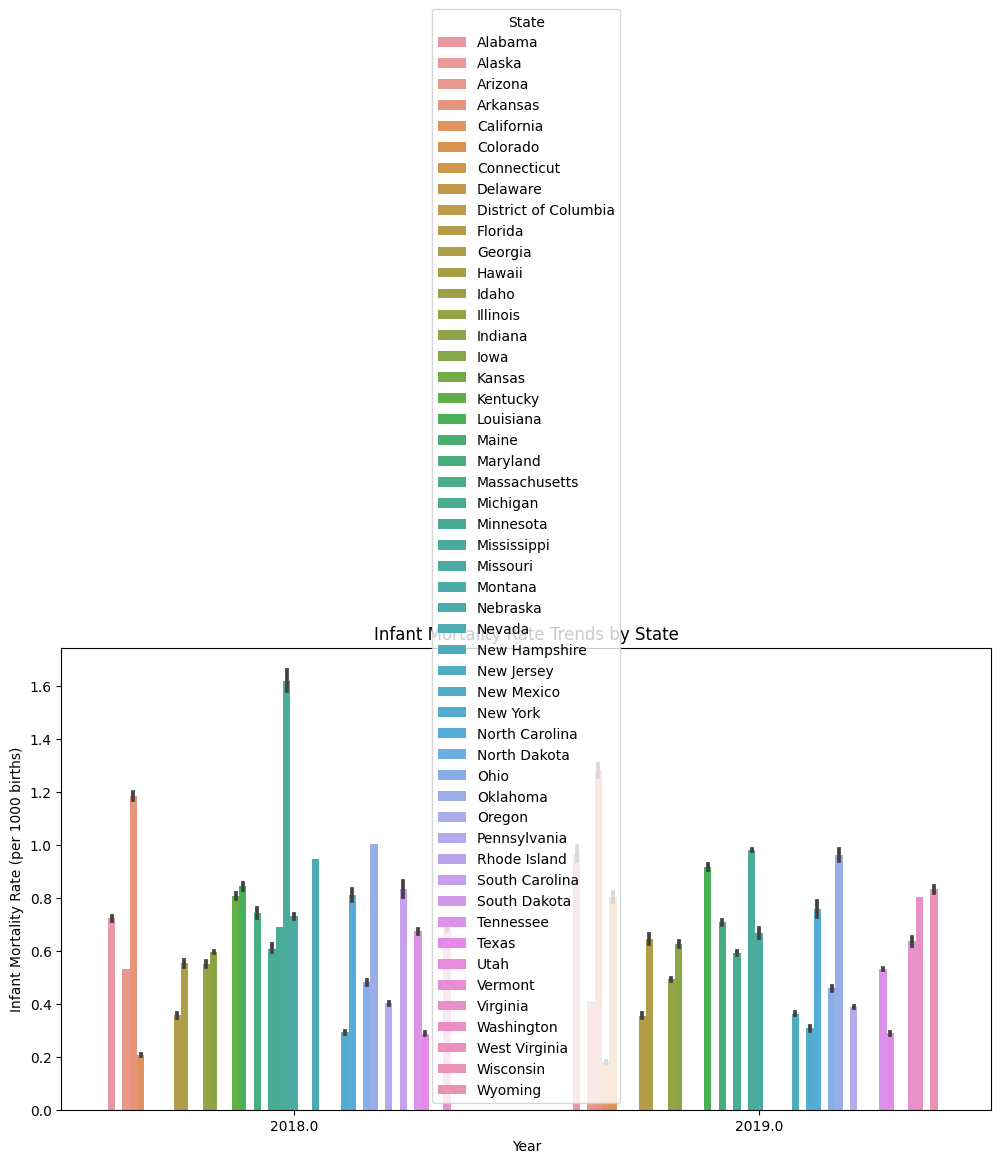

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Infant Mortality Rate
merged_data['Infant Mortality Rate'] = (merged_data['Deaths'] / merged_data['Births']) * 1000

# Visualize Infant Mortality Rate Trends
plt.figure(figsize=(12, 6))
sns.barplot(x='Year of death', y='Infant Mortality Rate', hue='State', data=merged_data)
plt.title('Infant Mortality Rate Trends by State')
plt.xlabel('Year')
plt.ylabel('Infant Mortality Rate (per 1000 births)')
plt.show()


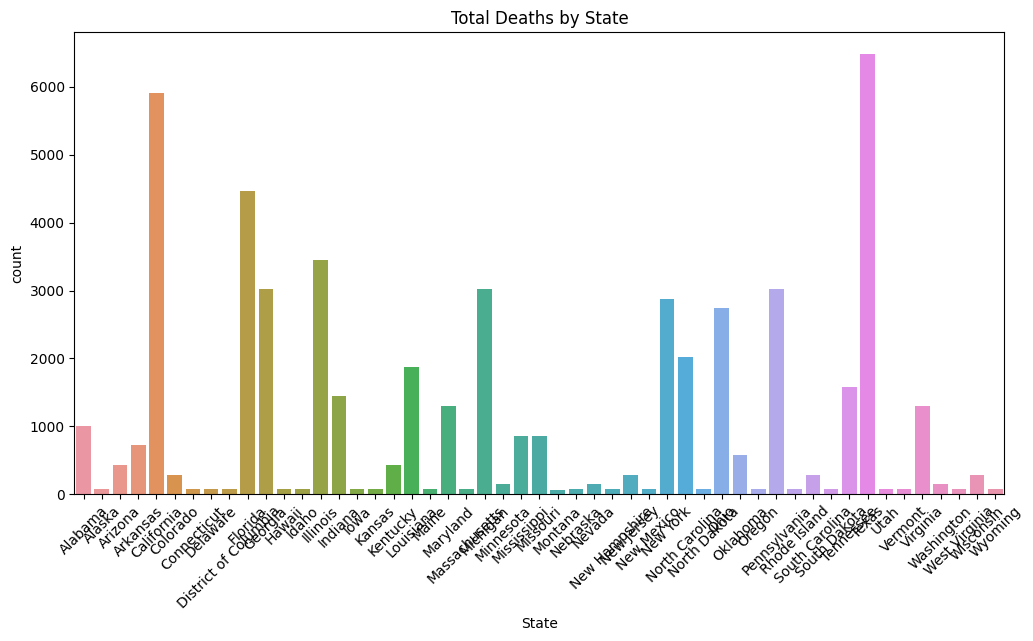

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=merged_data)
plt.title('Total Deaths by State')
plt.xticks(rotation=45)
plt.show()


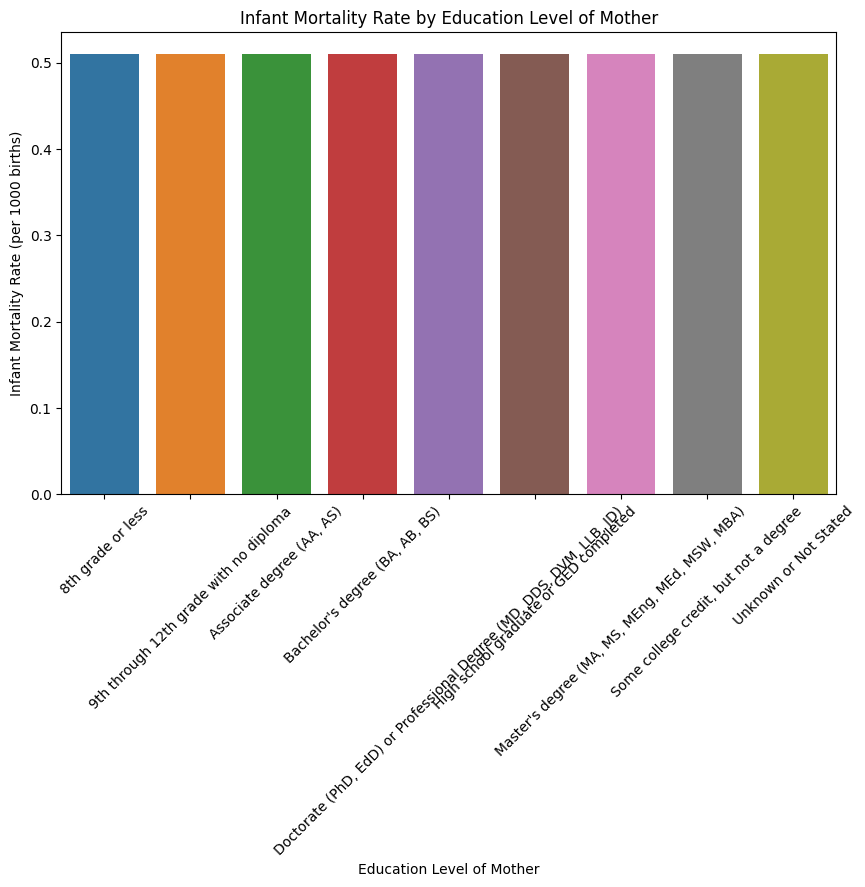

In [61]:
education_grouped = merged_data.groupby('Education Level of Mother').agg({
    'Infant Mortality Rate': 'mean',
    'Deaths': 'sum',
    'Births': 'sum'
}).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level of Mother', y='Infant Mortality Rate', data=education_grouped)
plt.title('Infant Mortality Rate by Education Level of Mother')
plt.xlabel('Education Level of Mother')
plt.ylabel('Infant Mortality Rate (per 1000 births)')
plt.xticks(rotation=45)
plt.show()

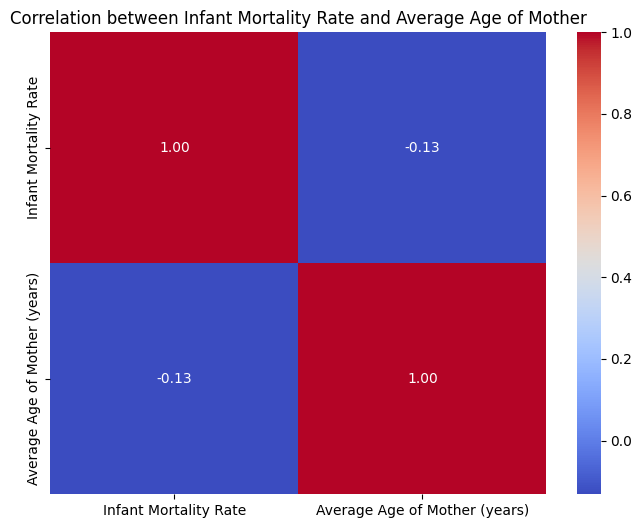

In [62]:
# Explore correlations with other factors
correlation_matrix = merged_data[['Infant Mortality Rate', 'Average Age of Mother (years)']].corr()

# Visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Infant Mortality Rate and Average Age of Mother')
plt.show()




In [69]:
# Pivot table for total deaths by state and cause of death
pivot_table_state_cause = merged_data.pivot_table(values='Deaths', index='State', columns='Cause of death', aggfunc='sum', fill_value=0)
print(pivot_table_state_cause)


KeyError: ignored